In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('seeds_dataset.txt', header = None, sep='\t')

In [4]:
data

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [5]:
data[[7]] = data[[7]].add(-1)

In [6]:
X = data[[0, 1, 2, 3, 4, 5, 6]]
y = data[[7]]

# Preprocessing

In [7]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(X)

In [8]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [9]:
pca.explained_variance_ratio_

array([7.18743027e-01, 1.71081835e-01, 9.68576341e-02, 9.76635386e-03,
       2.67337271e-03, 7.61720812e-04, 1.16056686e-04])

Text(0, 0.5, 'Cumulative Explained Variance')

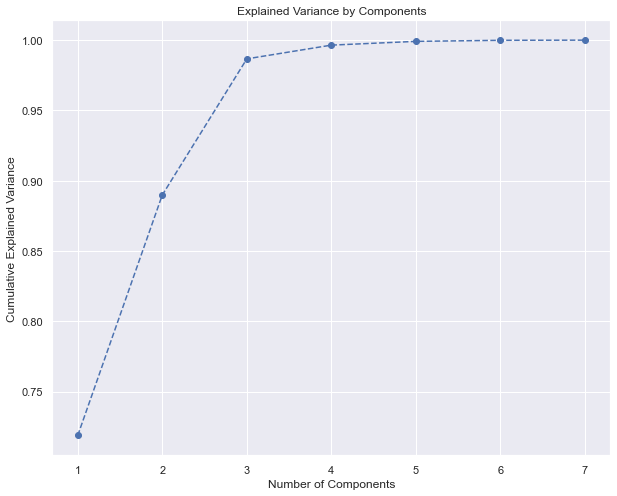

In [10]:
plt.figure(figsize = (10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [11]:
pca = PCA(n_components = 3)

In [12]:
pca.fit(segmentation_std)

PCA(n_components=3)

In [13]:
pca.transform(segmentation_std)

array([[ 3.17047052e-01,  7.83669015e-01, -6.31010011e-01],
       [-3.38617773e-03,  1.91321367e+00, -6.69754458e-01],
       [-4.59443341e-01,  1.90722525e+00,  9.32488818e-01],
       [-5.91935651e-01,  1.93106922e+00,  4.99310922e-01],
       [ 1.10291005e+00,  2.06809003e+00,  5.67054118e-02],
       [-3.36815150e-01,  1.63691626e+00,  4.38913151e-01],
       [-1.45602498e-01,  4.36414570e-01,  3.01945052e-01],
       [-4.25439933e-01,  1.39015330e+00,  4.01288373e-01],
       [ 1.76718434e+00,  3.07528830e-01, -9.68165725e-01],
       [ 1.44119415e+00,  1.01106830e+00, -3.83042144e-01],
       [ 6.71107449e-02, -4.29312461e-01,  3.25292810e-01],
       [-5.72683493e-01,  1.55824408e+00, -4.21773063e-01],
       [-9.31414541e-01,  8.73925640e-01,  9.48782466e-01],
       [-9.14882766e-01,  8.71940034e-01,  1.35349927e-01],
       [-1.00836149e+00,  9.58530316e-01, -2.09395370e-03],
       [-5.15522337e-01,  1.05872649e+00,  1.43548717e+00],
       [-7.84530515e-01,  1.14197655e+00

In [14]:
scores_pca = pca.transform(segmentation_std)

## K-Means PCA

In [15]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [27]:
df_segm_pca_kmeans = pd.concat([X.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = [101, 102, 103]
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [28]:
df_segm_pca_kmeans

,0,1,2,3,4,5,6,101,102,103,Segment K-means PCA
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0.317047,0.783669,-0.631010,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,-0.003386,1.913214,-0.669754,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,-0.459443,1.907225,0.932489,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,-0.591936,1.931069,0.499311,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.102910,2.068090,0.056705,2
...,...,...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,-1.991107,0.865956,0.513303,1
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,-2.726865,-0.208190,-0.059059,1
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,-1.403633,-1.298593,2.905811,1
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,-2.339328,0.099699,-0.382515,1


C:\Users\tolga\anaconda3\envs\DataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


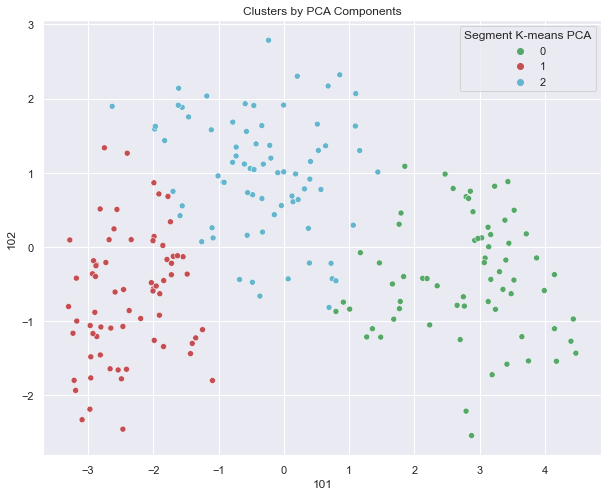

In [34]:
x_axis = df_segm_pca_kmeans[101]
y_axis = df_segm_pca_kmeans[102]
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment K-means PCA'], palette = ['g', 'r', 'c'])
plt.title('Clusters by PCA Components')
plt.show()

C:\Users\tolga\anaconda3\envs\DataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


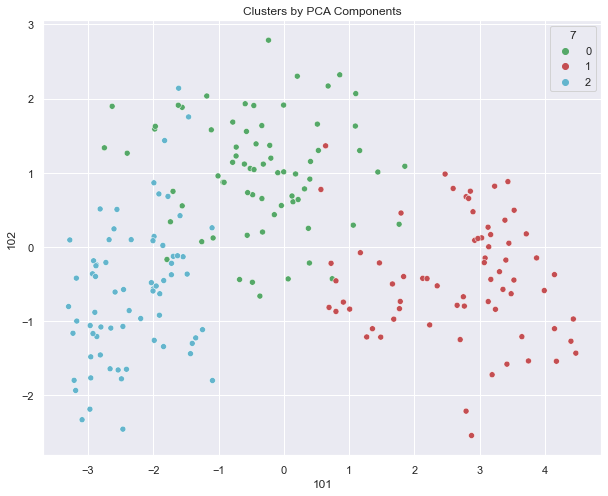

In [35]:
x_axis = df_segm_pca_kmeans[101]
y_axis = df_segm_pca_kmeans[102]
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = y[7], palette = ['g', 'r', 'c'])
plt.title('Clusters by PCA Components')
plt.show()

# K-Means

In [21]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [22]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
kmeans.cluster_centers_

array([[11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

In [24]:
pd.crosstab(y[7], kmeans.labels_)

col_0,0,1,2
7,,,
0,9,1,60
1,0,60,10
2,68,0,2


In [1]:
188/210

0.8952380952380953